In [1]:
import os,csv,json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import seaborn as sns
colorpalette = ['#65BADA','#87D0E2','#068E8C','#75B3A7','#00A757','#82BA4F','#E5BA52','#F3EA1F','#D86F27','#E89E23','#C82E6B','#D4668F','#991B37','#C30021','#364285','#5D5296','#7D5495']

In [40]:
# import csv
csv_file_name = "/Users/emilydennis/Desktop/lightsheet/humanvselastix.csv"

In [83]:
fulldf = pd.read_csv(csv_file_name)
fulldf.keys()
fulldf = fulldf[fulldf.annotator != 'Jorge']


SyntaxError: invalid syntax (<ipython-input-83-5dffe3637fa3>, line 4)

In [42]:
fulldf_nocomp = fulldf[fulldf.annotator != 'computer']
fulldf_comp = fulldf[fulldf.annotator == 'computer']

In [70]:
alldata = { } 

for name in np.unique(fulldf.annotator):
    alldata[name] = {}
    annotator = fulldf[fulldf.annotator==name]
    for volume in ["A","B","C","D","E","F","G","H"]:
        annotatorvol = annotator[annotator.volume==volume]
        alldata[name][volume]= {}
        for point in range(1,5):
            annotatorpt = annotatorvol[annotatorvol.point==point]
            alldata[name][volume][point] = [annotatorpt.x.tolist(),annotatorpt.y.tolist(),annotatorpt.z.tolist()]



In [80]:
# now that our data is easier to index, want to make different values for plotting
toplot = { } 

for name in np.unique(fulldf_nocomp.annotator):
    toplot[name] = {}
    #want C vs G
    toplot[name]['humanvar'] = {}
    toplot[name]['before'] = {}
    toplot[name]['affine'] = {}
    toplot[name]['a1b'] = {}    
    toplot[name]['final320'] = {}
    toplot[name]['accuracy']={}
    
    for point in range(1,5):        
        vals=(abs(np.subtract(alldata[name]['C'][point],alldata[name]['G'][point])))
        val = np.add(vals[0],vals[1],vals[2])
        toplot[name]['humanvar'][point] = val.item()
        
        vals=(abs(np.subtract(alldata[name]['B'][point],alldata[name]['F'][point])))
        val = np.add(vals[0],vals[1],vals[2])
        toplot[name]['before'][point] = val.item()
        
        vals=(abs(np.subtract(alldata[name]['D'][point],alldata[name]['F'][point])))
        val = np.add(vals[0],vals[1],vals[2])
        toplot[name]['affine'][point] = val.item()

        vals=(abs(np.subtract(alldata[name]['E'][point],alldata[name]['F'][point])))
        val = np.add(vals[0],vals[1],vals[2])
        toplot[name]['a1b'][point] = val.item()

        vals=(abs(np.subtract(alldata[name]['C'][point],alldata[name]['F'][point])))
        val = np.add(vals[0],vals[1],vals[2])
        toplot[name]['final320'][point] = val.item()
        
        vals=(abs(np.subtract(alldata[name]['F'][point],alldata['computer']['A'][point])))
        val = np.add(vals[0],vals[1],vals[2])
        toplot[name]['accuracy'][point] = val.item()        

In [135]:
# calculate for each annotator, each point
forplots = ['humanvar','before','affine','a1b','final320','accuracy']
anns = ['Emily','Jess','Marino','Peter']
#np.unique(fulldf_nocomp.annotator)
points = [1,2,3,4]
# want for each comparison, a value for each annotator and each point
# columns = comparison, annotator, point
# data = [{'comparison':'humanvar','annotator':'name','point':1,'value':}]


In [136]:
collapsedpts=[]
for comparison in forplots:
    for name in anns:
        collapsedpts.append([comparison,name,np.mean([*toplot[name][comparison].values()])])
            
pts=[]
for comparison in forplots:
    for name in anns:
        for point in points:
            pts.append([comparison,name,point,toplot[name][comparison][point]])

In [137]:
pts_df = pd.DataFrame(pts,columns=['comparison','name','pts','value'])

In [138]:
acc = pts_df[pts_df.comparison == 'accuracy']
fail = acc[acc.value > 40]
for idx in fail.index:
    name = fail.name[fail.index==idx]
    pts = float(fail.pts[fail.index==idx])
    print(name)
    print(pts)

[(0.1, 200)]

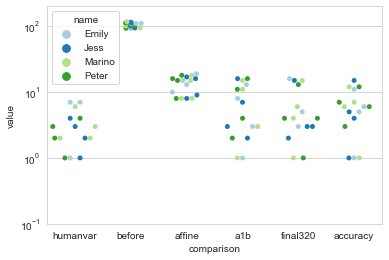

In [141]:

ax = sns.set_style('whitegrid')
ax=sns.set_palette("Paired")
ax= sns.swarmplot(x='comparison',y='value',data=pts_df,hue='name')
ax.set(yscale='log')
ax.set(ylim=(0.1,200))


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


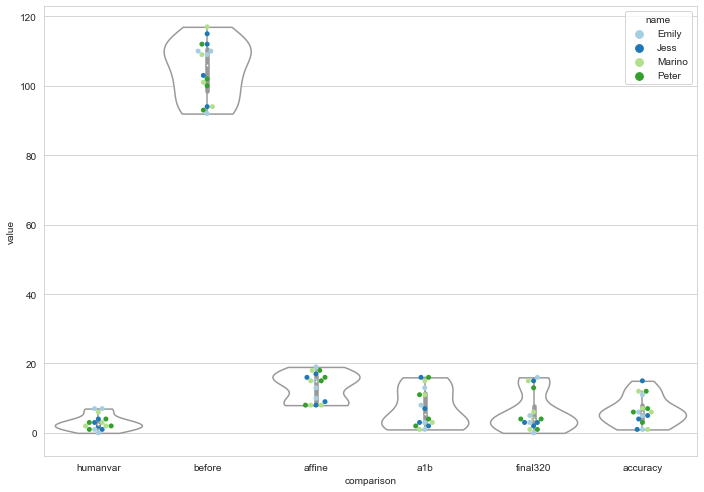

In [164]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

ax = sns.set_style('whitegrid')
ax=sns.set_palette("Paired")
ax= sns.swarmplot(ax=ax,x='comparison',y='value',data=pts_df,hue='name')
ax = sns.violinplot(ax=ax,x='comparison',y='value',data=pts_df,color='white',cut=0, scale="width")
plt.savefig('/Users/emilydennis/Desktop/humanvselastix_log_byperson.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


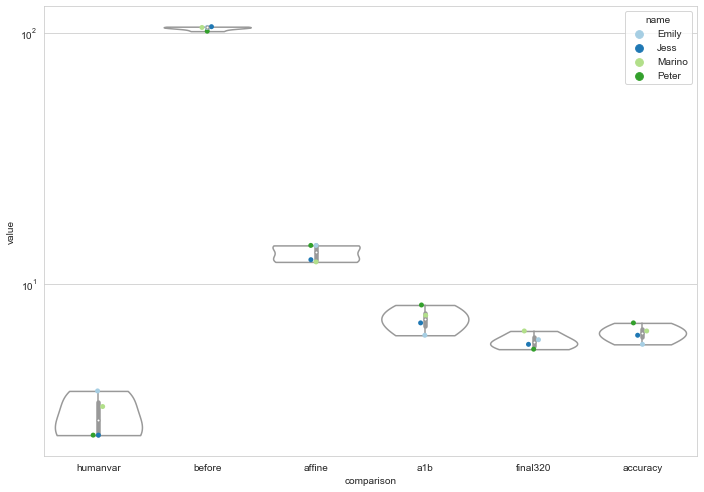

In [168]:
a4_dims = (11.7, 8.27)
fig, ax2 = plt.subplots(figsize=a4_dims)
collapsed_pts_df=collapsed_pts_df[collapsed_pts_df.name != 'Adrian']
collapsed_pts_df=collapsed_pts_df[collapsed_pts_df.name != 'Chuck']
collapsed_pts_df=collapsed_pts_df[collapsed_pts_df.name != 'Thomas']
collapsed_pts_df=collapsed_pts_df[collapsed_pts_df.comparison != 'final315']
collapsed_pts_df=collapsed_pts_df[collapsed_pts_df.comparison != 'final315v320']


ax2 = sns.set_style('whitegrid')
ax2=sns.set_palette("Paired")
ax2= sns.swarmplot(x='comparison',y='value',data=collapsed_pts_df,hue='name')
ax2 = sns.violinplot(ax=ax2,x='comparison',y='value',data=collapsed_pts_df,color='white',cut=0, scale="width")
ax2.set(yscale='log')
plt.savefig('/Users/emilydennis/Desktop/humanvselastix_notlog_collapsed.eps')

In [ ]:
a4_dims = (11.7, 8.27)
fig, ax2 = plt.subplots(figsize=a4_dims)

ax2 = sns.set_style('whitegrid')
ax2=sns.set_palette("Paired")
ax2= sns.swarmplot(x='comparison',y='value',data=collapsed_pts_df,hue='name')
ax2 = sns.violinplot(ax=ax2,x='comparison',y='value',data=collapsed_pts_df,color='white',cut=0, scale="width")
ax2.set(y)
plt.savefig('/Users/emilydennis/Desktop/humanvselastix_log_collapsed.eps')

In [55]:
pts_df['logval'] = np.log10(pts_df['value'])

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [134]:
ax = sns.set_style('whitegrid')
ax=sns.set_palette("Paired")
ax= sns.swarmplot(x='comparison',y='logval',data=pts_df)
ax = plt.ylim(-1,3)

plt.savefig('/Users/emilydennis/Desktop/humanvselastix_withJ.eps')

ValueError: Could not interpret input 'logval'

In [57]:
import scipy.stats as stats

In [58]:
pts_df_sub

,comparison,name,pts,value,logval
0,humanvar,Emily,1,0.0,-inf
1,humanvar,Emily,2,7.0,0.845098
2,humanvar,Emily,3,1.0,0.000000
3,humanvar,Emily,4,7.0,0.845098
4,humanvar,Peter,1,1.0,0.000000
...,...,...,...,...,...
123,accuracy,Jess,4,1.0,0.000000
124,accuracy,Marino,1,6.0,0.778151
125,accuracy,Marino,2,12.0,1.079181
126,accuracy,Marino,3,7.0,0.845098


In [59]:
stats.f_oneway(pts_df_sub['value'][pts_df_sub['comparison']=='humanvar'],
              pts_df_sub['value'][pts_df_sub['comparison']=='before'],
              pts_df_sub['value'][pts_df_sub['comparison']=='affine'],
              pts_df_sub['value'][pts_df_sub['comparison']=='a1b'],
              pts_df_sub['value'][pts_df_sub['comparison']=='final320'])

F_onewayResult(statistic=1001.9869615289698, pvalue=3.026207162945164e-64)

In [60]:
hv = pts_df_sub[pts_df_sub['comparison']=='humanvar']
b = pts_df_sub[pts_df_sub['comparison']=='before']
a1b=pts_df_sub[pts_df_sub['comparison']=='a1b']
f320 = pts_df_sub[pts_df_sub['comparison']=='final320']
a = pts_df_sub[pts_df_sub['comparison']=='affine']

In [61]:
stats.ttest_ind(hv['value'],b['value']) #*

Ttest_indResult(statistic=-47.484316843601, pvalue=8.642905140622162e-30)

In [62]:
stats.ttest_ind(hv['value'],a['value']) #*

Ttest_indResult(statistic=-8.883301383959731, pvalue=6.688412135584031e-10)

In [63]:
stats.ttest_ind(hv['value'],a1b['value'])

Ttest_indResult(statistic=-2.830713514619314, pvalue=0.008211091388048803)

In [64]:
stats.ttest_ind(hv['value'],f320['value'])

Ttest_indResult(statistic=-1.993841748739402, pvalue=0.055329209451954256)

In [66]:
stats.ttest_ind(f320['value'],a['value']) #*

Ttest_indResult(statistic=-4.292754307520133, pvalue=0.00016984335065393027)

In [67]:
stats.ttest_ind(f320['value'],a1b['value'])

Ttest_indResult(statistic=-0.6682117319110139, pvalue=0.5091073266515916)

In [68]:
stats.ttest_ind(a1b['value'],a['value']) #*

Ttest_indResult(statistic=-3.47985561617075, pvalue=0.0015578687468670682)

0.0071428571428571435